# scenario comparisons

this notebook uses `heat_loss_scenarios` to compare material and window options.


In [ ]:
import sys
import pathlib

repo_root = pathlib.Path('..').resolve()
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

import pandas as pd
from heat_loss_simulation import heat_loss_scenarios
from visualizations import (
    plot_heat_loss_by_insulation,
    plot_cost_by_window_type,
)

## 1. generate a scenario grid

we hold building size and climate fixed and sweep over roof, window, and insulation options.


In [ ]:
scenarios = heat_loss_scenarios(
    sqft_roof=1800,
    sqft_walls=1500,
    ambient_temp_F=30,
    T_inside_F=70,
    duration_hours=24,
    air_changes_per_hour=0.5,
    window_area_sqft=400,
    electricity_cost_per_kWh=0.12,
)
scenarios.head()

,sqft_roof,sqft_walls,roof_material_type,wall_material_type,ambient_temp_F,T_inside_F,duration_hours,insulation_r_value,air_changes_per_hour,window_area_sqft,...,Q_roof_kWh,Q_walls_kWh,Q_windows_kWh,Q_infiltration_kWh,Q_roof_pct,Q_walls_pct,Q_windows_pct,Q_infiltration_pct,total_cost,Q_total_kWh
23,1800,1500,wood,wood,30,70,24,R34-R60,0.5,400,...,10.614744,8.157881,31.710891,67.447578,9.000801,6.917498,26.889338,57.192362,14.151731,117.931093
11,1800,1500,asphalt,wood,30,70,24,R34-R60,0.5,400,...,10.742599,8.157881,31.710891,67.447578,9.099351,6.910006,26.860218,57.130424,14.167074,118.058948
47,1800,1500,tile,wood,30,70,24,R34-R60,0.5,400,...,10.757323,8.157881,31.710891,67.447578,9.110687,6.909145,26.856868,57.123300,14.168841,118.073672
35,1800,1500,metal,wood,30,70,24,R34-R60,0.5,400,...,10.775027,8.157881,31.710891,67.447578,9.124313,6.908109,26.852842,57.114736,14.170965,118.091376
22,1800,1500,wood,wood,30,70,24,R22-R33,0.5,400,...,17.639531,12.893316,31.710891,67.447578,13.601166,9.941541,24.451052,52.006241,15.562958,129.691315


sort by `Q_total_kWh` or `total_cost` to see which combinations perform best or worst.


In [ ]:
cols = [
    'roof_material_type',
    'insulation_r_value',
    'window_type',
    'Q_total_kWh',
    'total_cost',
]
scenarios[cols].sort_values('Q_total_kWh').head(10).round(2)

,roof_material_type,insulation_r_value,window_type,Q_total_kWh,total_cost
23,wood,R34-R60,triple,117.93,14.15
11,asphalt,R34-R60,triple,118.06,14.17
47,tile,R34-R60,triple,118.07,14.17
35,metal,R34-R60,triple,118.09,14.17
22,wood,R22-R33,triple,129.69,15.56
10,asphalt,R22-R33,triple,130.05,15.61
46,tile,R22-R33,triple,130.09,15.61
34,metal,R22-R33,triple,130.14,15.62
19,wood,R34-R60,double,141.71,17.01
7,asphalt,R34-R60,double,141.84,17.02


## 2. compare by insulation band


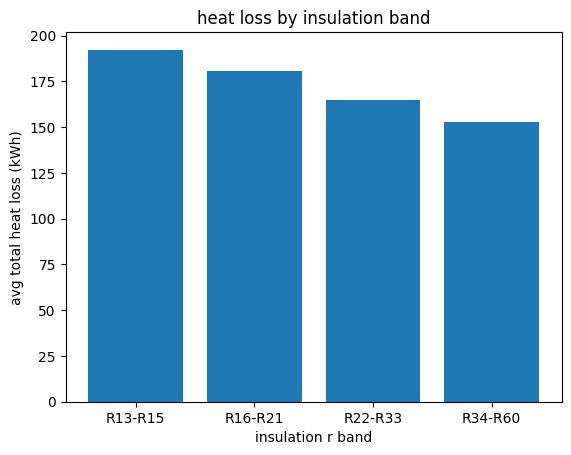

In [ ]:
_ = plot_heat_loss_by_insulation(scenarios)

the bar chart shows average `Q_total_kWh` for each insulation band.
look for diminishing returns between the highest bands.


## 3. compare by window type


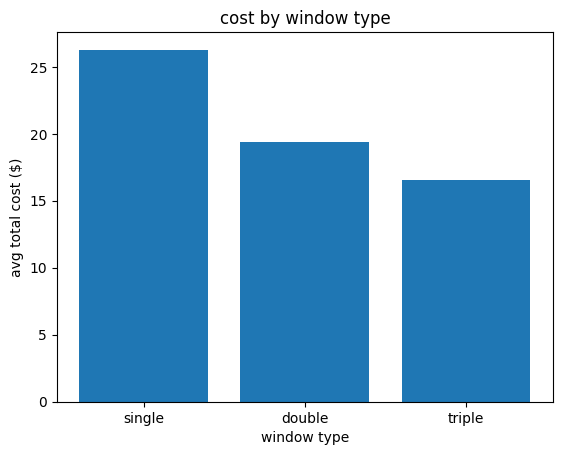

In [ ]:
_ = plot_cost_by_window_type(scenarios)

the bar chart shows average `total_cost` by window type.
pair this with the insulation plot to discuss which upgrade gives more impact.


## 4. focus on a single design

here we filter to one roof material and insulation band and vary only the window type.


In [ ]:
subset = scenarios.query(
    "roof_material_type == 'wood' and insulation_r_value == 'R22-R33'"
)
subset[['window_type', 'Q_total_kWh', 'total_cost']].sort_values('Q_total_kWh')

,window_type,Q_total_kWh,total_cost
22,triple,129.691315,15.562958
18,double,153.474483,18.416938
14,single,210.950473,25.314057


try changing the filter and re-running to explore other design slices.
